Integrate the irradiance between a certain period of time, to predict array energy intake

This example computes the total irradiance over our day 1 race time, with units of Wh/m^2


Coordinates 37.01230239868164°N -86.31924438476562°E
Elevation 161.0 m asl
Timezone b'America/Chicago' b'CDT'
Timezone difference to GMT+0 -18000 s


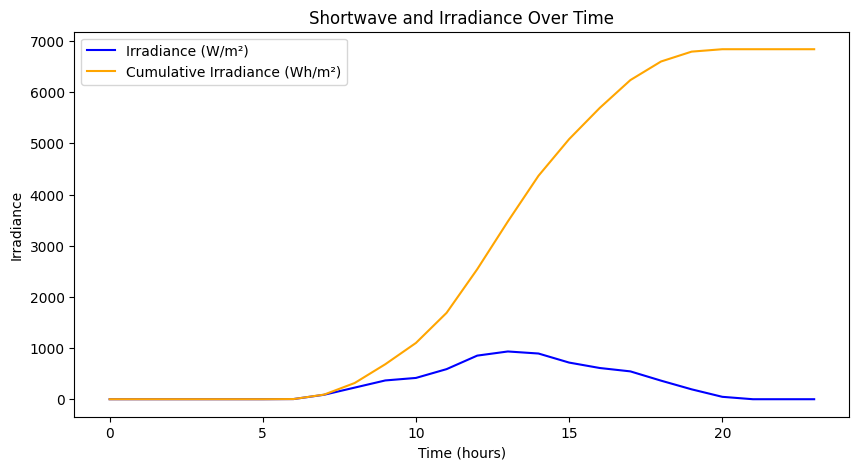

In [14]:
from request_irradiance import get_irradiance_archive
import matplotlib.pyplot as plt

DAY_ONE = "2024-07-16"
DAY_TWO = "2024-07-17"
NCM_MOTORSPORTS_LAT = 37.0006332
NCM_MOTORSPORTS_LONG = -86.3709907
FSGP_TIMEZONE = "America/Chicago"

day_1_irradiance = get_irradiance_archive(NCM_MOTORSPORTS_LAT,
                                          NCM_MOTORSPORTS_LONG,
                                          DAY_ONE,
                                          DAY_ONE,
                                          FSGP_TIMEZONE)

day_1_irradiance_cumulative = day_1_irradiance['shortwave_radiation'].cumsum()
plt.figure(figsize=(10, 5))
plt.plot(day_1_irradiance['shortwave_radiation'], label='Irradiance (W/m²)', color='blue')
plt.plot(day_1_irradiance_cumulative, label='Cumulative Irradiance (Wh/m²)', color='orange')
plt.xlabel('Time (hours)')
plt.ylabel('Irradiance')
plt.title('Shortwave and Irradiance Over Time')
plt.legend()
plt.show()

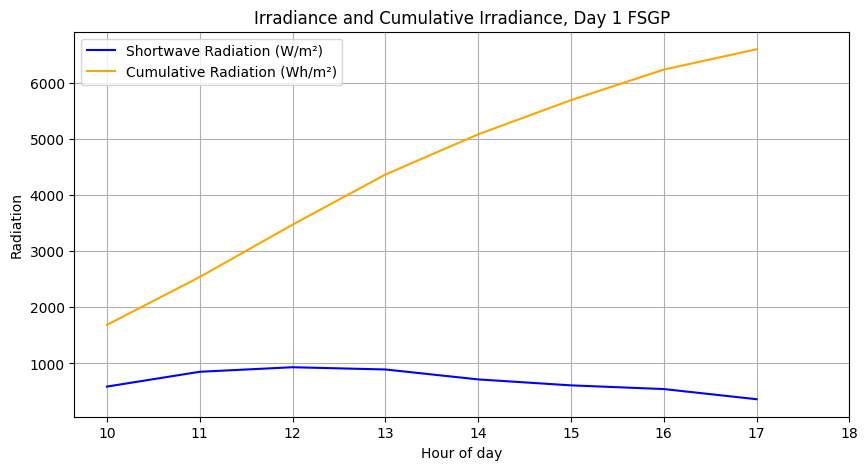

Total irradiance on 2024-07-16 between 10 o' clock and 10 o'clock: 4911.0 Wh/m^2


In [15]:
RACE_START_HOUR = 10  # 10AM start
RACE_END_HOUR = 18  # 6PM end

# Add 1 to hour values since data is averaged over the previous hour
race_irradiance = day_1_irradiance['shortwave_radiation'][RACE_START_HOUR + 1:RACE_END_HOUR + 1]
race_cumulative_irradiance = day_1_irradiance_cumulative[RACE_START_HOUR + 1:RACE_END_HOUR + 1]

plt.figure(figsize=(10, 5))
plt.plot(range(RACE_START_HOUR, RACE_END_HOUR), race_irradiance.values, label='Shortwave Radiation (W/m²)', color='blue')
plt.plot(range(RACE_START_HOUR, RACE_END_HOUR), race_cumulative_irradiance.values, label='Cumulative Radiation (Wh/m²)', color='orange')
plt.xlabel('Hour of day')
plt.ylabel('Radiation')
plt.title('Irradiance and Cumulative Irradiance, Day 1 FSGP')
plt.legend()
plt.xticks(range(RACE_START_HOUR, RACE_END_HOUR + 1))  # Show ticks for each hour
plt.grid()
plt.show()

total_irradiance = race_cumulative_irradiance.values[-1] - race_cumulative_irradiance.values[0]
print(f"Total irradiance on {DAY_ONE}"
      f" between {RACE_START_HOUR} o' clock and {RACE_START_HOUR} o'clock: {total_irradiance} Wh/m^2")